In [ ]:
# Importing the data from Kaggle

!pip install kaggle

# Uploading the api key file .json
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Downloading and unzipping the dataset (for memory efficiency)
!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024
!unzip -q 1-3m-linkedin-jobs-and-skills-2024.zip -d ./linkedin_dataset

# Reading the loaded datasets
import pandas as pd

job_postings = pd.read_csv('./linkedin_dataset/linkedin_job_postings.csv')
job_summary = pd.read_csv('./linkedin_dataset/job_summary.csv')
job_skills = pd.read_csv('./linkedin_dataset/job_skills.csv')


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)
100% 1.87G/1.88G [00:16<00:00, 81.1MB/s]
100% 1.88G/1.88G [00:16<00:00, 121MB/s] 


In [ ]:
# Checking the dtypes to understand the datatypes of the columns each DataFrame
print(job_postings.dtypes)
print(job_summary.dtypes)
print(job_skills.dtypes)

job_link               object
last_processed_time    object
got_summary            object
got_ner                object
is_being_worked        object
job_title              object
company                object
job_location           object
first_seen             object
search_city            object
search_country         object
search_position        object
job_level              object
job_type               object
dtype: object
job_link       object
job_summary    object
dtype: object
job_link      object
job_skills    object
dtype: object


In [ ]:
# Printing the first 5 rows of each DataFrame

print("Job Postings")
print(job_postings.head())

print("\n Job Summary")
print(job_summary.head())

print("\n Job Skills")
print(job_skills.head())

Job Postings
                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   
2  https://www.linkedin.com/jobs/view/restaurant-...   
3  https://www.linkedin.com/jobs/view/independent...   
4  https://www.linkedin.com/jobs/view/group-unit-...   

             last_processed_time got_summary got_ner is_being_worked  \
0   2024-01-21 07:12:29.00256+00           t       t               f   
1   2024-01-21 07:39:58.88137+00           t       t               f   
2  2024-01-21 07:40:00.251126+00           t       t               f   
3  2024-01-21 07:40:00.308133+00           t       t               f   
4  2024-01-19 09:45:09.215838+00           f       f               f   

                                           job_title  \
0  Account Executive - Dispensing (NorCal/Norther...   
1                 Registered Nurse - RN Care Manager   
2               RESTAURANT SUPERVISOR - THE FORKL

In [ ]:
# We see that 'job_link' is present in each of the DataFrame and therefore that could be the primary key to merge them and generate a single DataFrame
# Therefore checking if there are any duplicates in 'job_link' in either of the DataFrame

print("Job Postings")
print(job_postings['job_link'].nunique())
print(job_postings['job_link'].duplicated().sum())

print("\n Job Summary")
print(job_summary['job_link'].nunique())
print(job_summary['job_link'].duplicated().sum())

print("\n Job Skills")
print(job_skills['job_link'].nunique())
print(job_skills['job_link'].duplicated().sum())

Job Postings
1348454
0

 Job Summary
1297332
0

 Job Skills
1296381
0


In [ ]:
# Printing the row lengths
print(f"job_postings: {len(job_postings):,}")
print(f"job_summary: {len(job_summary):,}")
print(f"job_skills: {len(job_skills):,}")


job_postings: 1,348,454
job_summary: 1,297,332
job_skills: 1,296,381


In [ ]:
import pandas as pd

# Defining the common key
key_merging = 'job_link'

# Cleaning duplicates before merging
row_i = len(job_postings)
job_postings.drop_duplicates(subset=[key_merging], keep='first', inplace=True)
print(f"Removed {row_i - len(job_postings)} duplicates")

# Merging Job Postings with Job Summary
jobs_n_summary = pd.merge(
    job_postings,
    job_summary,
    on=key_merging,
    how='left'
)
print(f"Done. Shape: {jobs_n_summary.shape}")

# Merging with Job Skills
final_df = pd.merge(
    jobs_n_summary,
    job_skills,
    on=key_merging,
    how='left',
    validate='many_to_many'
)

print(f"Done. Shape: {final_df.shape}")

print(final_df.head(2))


Removed 0 duplicates
Done. Shape: (1348454, 15)
Done. Shape: (1348454, 16)
                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   

            last_processed_time got_summary got_ner is_being_worked  \
0  2024-01-21 07:12:29.00256+00           t       t               f   
1  2024-01-21 07:39:58.88137+00           t       t               f   

                                           job_title            company  \
0  Account Executive - Dispensing (NorCal/Norther...                 BD   
1                 Registered Nurse - RN Care Manager  Trinity Health MI   

        job_location  first_seen  search_city search_country  \
0      San Diego, CA  2024-01-15     Coronado  United States   
1  Norton Shores, MI  2024-01-14  Grand Haven  United States   

            search_position   job_level job_type  \
0               Color Maker  Mid senior   Onsite   
1  Director Nursing

In [ ]:
# Checking missing values (pre-merging)
print("\n job_postings")
print(job_postings.isnull().sum())

print("\n job_skills")
print(job_skills.isnull().sum())

print("\n job_summary")
print(job_summary.isnull().sum())



 job_postings
job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64

 job_skills
job_link         0
job_skills    2085
dtype: int64

 job_summary
job_link       0
job_summary    0
dtype: int64


In [ ]:
# Counting missing values for the merged DataFrame
missing_counts = final_df.isnull().sum()

print(missing_counts)

job_link                   0
last_processed_time        0
got_summary                0
got_ner                    0
is_being_worked            0
job_title                  0
company                   11
job_location              19
first_seen                 0
search_city                0
search_country             0
search_position            0
job_level                  0
job_type                   0
job_summary            51122
job_skills             54158
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Basic data cleaning (Missing and Convert Types) for EDA

cols = ['job_location', 'company']

rows_i = len(final_df)
# Drop rows with missing data
final_df.dropna(subset=cols, inplace=True)
print(f"Dropped {rows_i - len(final_df)} rows with missing company or location data.")


# Converting date columns
cols_date = ['last_processed_time', 'first_seen']

for col in cols_date:
    final_df[col] = pd.to_datetime(final_df[col], errors='coerce', utc=True)
    final_df.dropna(subset=[col], inplace=True)


# 'job_title' cleaning
final_df['job_title_clean'] = final_df['job_title'].astype(str).str.lower().str.strip()

# Changing 'job_skills' to str
final_df['job_skills'] = final_df['job_skills'].astype(str)

print("Data cleaning complete")

# Basic Summary Statistics

print("\n--- Data Summary Report ---")

# 1. Job Level Distribution
print("\n1. Job Level Distribution:")
print(final_df['job_level'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

# 2. Top 10 Job Titles
print("\n2. Top 10 Cleaned Job Titles:")
print(final_df['job_title_clean'].value_counts().head(10))

# 3. Top 10 Companies
company_counts = final_df.drop_duplicates(subset=['job_link'])['company'].value_counts().head(10)
print("\n3. Top 10 Companies by Posting Volume:")
print(company_counts)

Dropped 30 rows with missing company or location data.
Data cleaning complete

--- Data Summary Report ---

1. Job Level Distribution:
job_level
Mid senior    89.32%
Associate     10.68%
Name: proportion, dtype: object

2. Top 10 Cleaned Job Titles:
job_title_clean
customer service representative                        9436
lead sales associate-ft                                7325
shift manager                                          5849
store manager                                          5748
assistant manager                                      5540
first year tax professional                            5356
lead sales associate-pt                                4924
registered nurse                                       4336
hourly supervisor & training                           2955
travel allied health professional - ct technologist    2933
Name: count, dtype: int64

3. Top 10 Companies by Posting Volume:
company
Health eCareers           41597
Jobs for Humanity         27

/tmp/ipython-input-1396339134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.index, y=company_counts.values, palette="viridis")


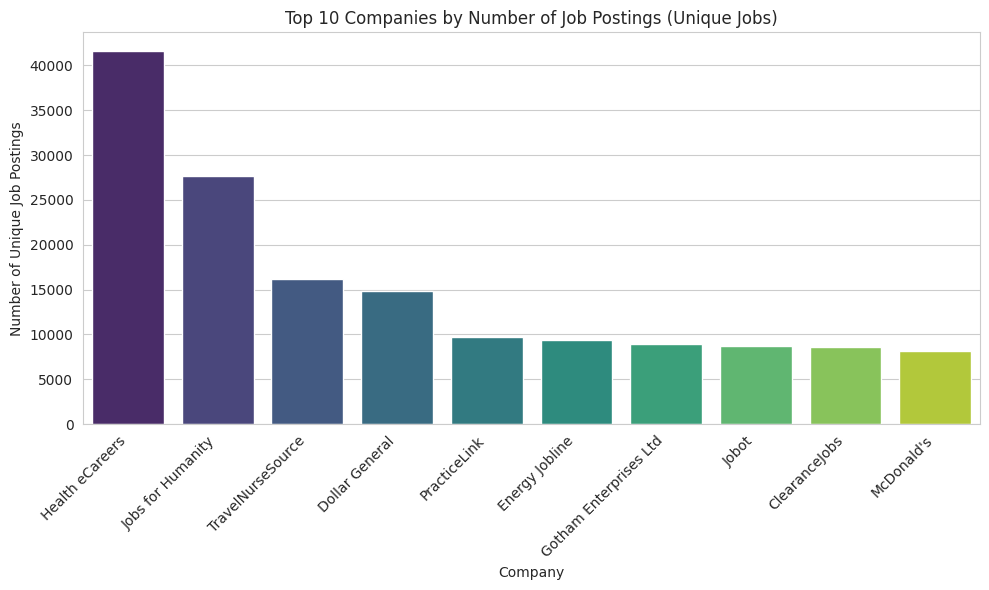

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# VISUALIZATION 1: Top 10 Companies Hiring

plt.figure(figsize=(10, 6))

sns.barplot(x=company_counts.index, y=company_counts.values, palette="viridis")
plt.title('Top 10 Companies by Number of Job Postings (Unique Jobs)')
plt.xlabel('Company')
plt.ylabel('Number of Unique Job Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


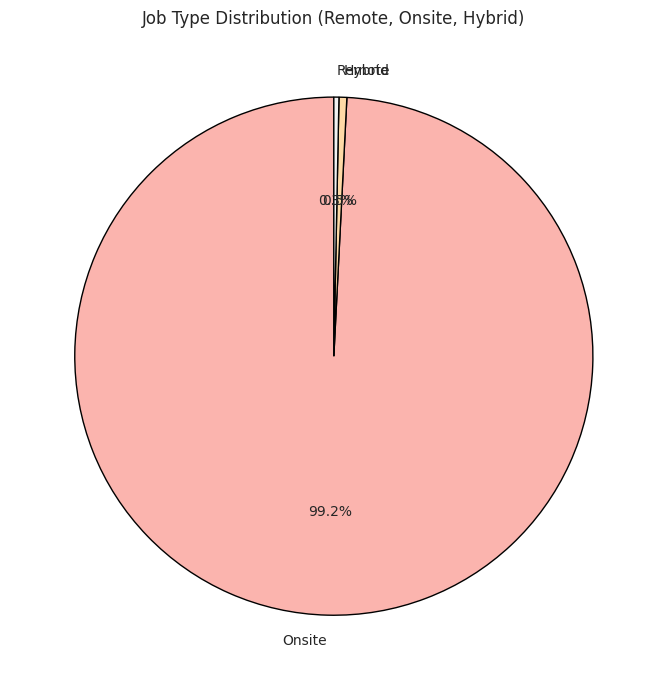

In [ ]:
# VISUALIZATION 2: Job Type Distribution

plt.figure(figsize=(7, 7))
job_type_counts = final_df.drop_duplicates(subset=['job_link'])['job_type'].value_counts(normalize=True) * 100
job_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1', wedgeprops={'edgecolor': 'black'})
plt.title('Job Type Distribution (Remote, Onsite, Hybrid)')
plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3150342425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_level', data=final_df.drop_duplicates(subset=['job_link']),


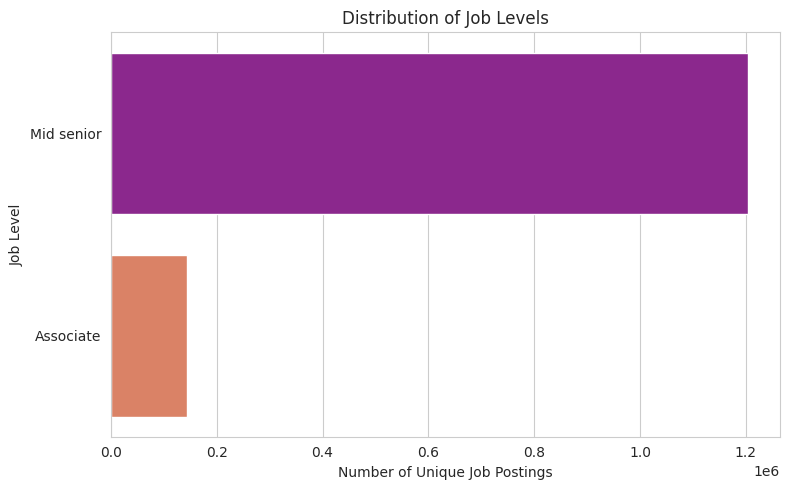

In [ ]:
# VISUALIZATION 3: Distribution of Job Levels

plt.figure(figsize=(8, 5))
sns.countplot(y='job_level', data=final_df.drop_duplicates(subset=['job_link']),
              order=final_df['job_level'].value_counts().index, palette='plasma')
plt.title('Distribution of Job Levels')
plt.xlabel('Number of Unique Job Postings')
plt.ylabel('Job Level')
plt.tight_layout()
plt.show()

/tmp/ipython-input-273918294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="cubehelix")


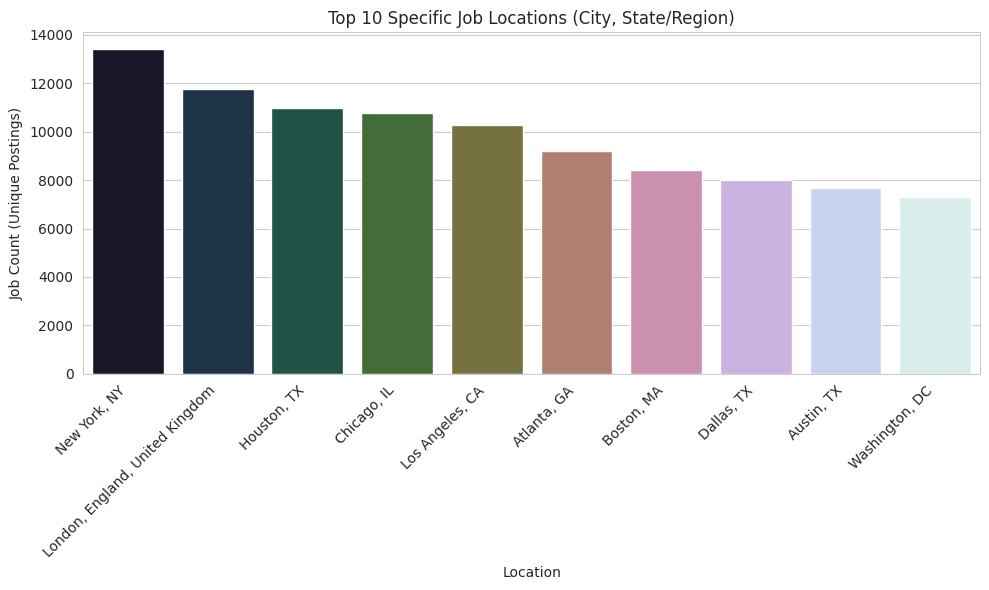

In [ ]:
# VISUALIZATION 4: Top 10 Cities/Specific Locations

plt.figure(figsize=(10, 6))

city_counts = final_df.drop_duplicates(subset=['job_link'])['job_location'].value_counts().head(10)

sns.barplot(x=city_counts.index, y=city_counts.values, palette="cubehelix")
plt.title('Top 10 Specific Job Locations (City, State/Region)')
plt.xlabel('Location')
plt.ylabel('Job Count (Unique Postings)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()